### Classification binaire : diabetique ou non diabetique
- Classe 1 : diabétique

- Classe 0 : non diabétique

In [69]:
import numpy as np
import pandas as pd


# Dataset fictif
data = {
    'IMC': [22, 27, 30, 25, 35, 28, 23, 40, 32, 24,
            26, 31, 29, 21, 36, 33, 24, 38, 34, 27,
            23, 39, 30, 25, 37, 28, 32, 22, 41, 29],
    'Age': [25, 50, 45, 30, 60, 35, 28, 55, 48, 32,
            40, 52, 46, 29, 62, 50, 31, 58, 49, 33,
            27, 61, 44, 36, 59, 38, 47, 26, 65, 42],
    'Activité_par_semaine': [5, 2, 1, 4, 0, 3, 5, 0, 1, 6,
                             3, 1, 2, 6, 0, 2, 5, 0, 1, 4,
                             5, 0, 2, 3, 0, 4, 1, 5, 0, 3],
    'Diabete': [0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
                0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)
X = df[['IMC', 'Age', 'Activité_par_semaine']].values  # Features
y = df['Diabete'].values  # Labels

In [70]:
X.shape

(30, 3)

In [71]:
df.index.name = "échantillon"
df

,IMC,Age,Activité_par_semaine,Diabete
échantillon,,,,
0,22,25,5,0
1,27,50,2,1
2,30,45,1,1
3,25,30,4,0
4,35,60,0,1
5,28,35,3,0
6,23,28,5,0
7,40,55,0,1
8,32,48,1,1


#### Passage des features dans $ \mathbb{R}^N \to \mathbb{R} $ (logit)

Pour un modèle logistique simple, on commence par calculer le **logit** :

$$
z = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n = w^T x
$$

Puis on applique la **fonction sigmoïde** pour obtenir une probabilité comprise entre 0 et 1 :

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$


In [72]:
# Implémentation Python de la sigmoïde et du logit
def sigmoid(z) :
    return 1/ (1 +np.exp(-z))


In [73]:
# on prend un exemple pour voir la probabilité de sortie :
w = np.array([0.1, 0.05, -0.2])  # poids pour IMC, Age, Activité
b = -3  # biais

In [74]:
# Calcul du logit
z = np.dot(X, w) + b

# Probabilité de diabète
prob = sigmoid(z)
print("Probabilités : ", prob)

Probabilités :  [0.36586441 0.85814894 0.88594762 0.549834   0.97068777 0.72111518
 0.42555748 0.97702263 0.9168273  0.450166   0.73105858 0.92414182
 0.85814894 0.34298954 0.97587298 0.9168273  0.4875026  0.97587298
 0.93401099 0.63413559 0.41338242 0.98110904 0.85814894 0.66818777
 0.9746673  0.7109495  0.91293423 0.37754067 0.98725765 0.80218389]


#### Décision binaire à partir de la probabilité

On applique la règle simple pour prédire la classe :

$$
\hat{y} =
\begin{cases} 
1 & \text{si } \sigma(z) \geq 0.5 \\[2mm]
0 & \text{sinon}
\end{cases}
$$

In [75]:
# décision à travers la probabilité

y_pred = (prob >= 0.5).astype(int) #(0 ou 1)
labels = np.where(y_pred == 1, "Diabétique", "Non diabétique")

print("Bilan des prédictions")
for i, label in enumerate(labels) :
    print(f"Patient {i} : {label}")
        
    

Bilan des prédictions
Patient 0 : Non diabétique
Patient 1 : Diabétique
Patient 2 : Diabétique
Patient 3 : Diabétique
Patient 4 : Diabétique
Patient 5 : Diabétique
Patient 6 : Non diabétique
Patient 7 : Diabétique
Patient 8 : Diabétique
Patient 9 : Non diabétique
Patient 10 : Diabétique
Patient 11 : Diabétique
Patient 12 : Diabétique
Patient 13 : Non diabétique
Patient 14 : Diabétique
Patient 15 : Diabétique
Patient 16 : Non diabétique
Patient 17 : Diabétique
Patient 18 : Diabétique
Patient 19 : Diabétique
Patient 20 : Non diabétique
Patient 21 : Diabétique
Patient 22 : Diabétique
Patient 23 : Diabétique
Patient 24 : Diabétique
Patient 25 : Diabétique
Patient 26 : Diabétique
Patient 27 : Non diabétique
Patient 28 : Diabétique
Patient 29 : Diabétique


#### Tracer un plan de décision 3D pour visualiser la séparation entre diabétiques et non diabétiques.

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#slider interactif
import ipywidgets as widgets
from IPython.display import display


from sklearn.linear_model import LogisticRegression

# X = données (IMC, Age, Activité)
# y = labels (Diabete)
model = LogisticRegression()
model.fit(X, y)
w = model.coef_[0]
b = model.intercept_[0]


# Création d'une grille 2D pour le feature IMG et AGE, afin de tracer le plan
imc_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 20)
age_vals = np.linspace(X[:,1].min()-1, X[:,1].max()+1, 20)
IMC, AGE = np.meshgrid(imc_vals, age_vals) #transforme les vecteurs en grilles 2D pour faciliter le tracé d’un plan ou d’une surface.

# Hyperplan : w1*IMC + w2*AGE + w3*Activité + b = 0 => Activité = -(w1*IMC + w2*AGE + b)/w3
ACTIVITE = -(w[0]*IMC + w[1]*AGE + b)/w[2]


In [77]:
# Fonction pour mettre à jour la vue
def update_view(elev=30, azim=45):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter points
    ax.scatter(X[y==1,0], X[y==1,1], X[y==1,2], color='red', label='Diabétique', s=50)
    ax.scatter(X[y==0,0], X[y==0,1], X[y==0,2], color='blue', label='Non diabétique', s=50)

    # Hyperplan
    ax.plot_surface(IMC, AGE, ACTIVITE, color='green', alpha=0.3)

    # Labels et titre
    ax.set_xlabel('IMC')
    ax.set_ylabel('Age')
    ax.set_zlabel('Activité par semaine')
    ax.set_title('Hyperplan de décision - Régression logistique')
    ax.legend()

    # Angle de vue
    ax.view_init(elev=elev, azim=azim)
    plt.show()

# Sliders pour interactivité
elev_slider = widgets.IntSlider(min=0, max=90, step=1, value=30, description='Élévation')
azim_slider = widgets.IntSlider(min=0, max=360, step=1, value=45, description='Azimut')

# Affichage interactif
widgets.interactive(update_view, elev=elev_slider, azim=azim_slider)

interactive(children=(IntSlider(value=30, description='Élévation', max=90), IntSlider(value=45, description='A…

In [78]:
plt.savefig("Classificaion binaire des patients")

<Figure size 640x480 with 0 Axes>

#### Fonction de coût et optimisation de perte logistique

La **fonction de coût logistique** mesure l’erreur moyenne entre les vraies valeurs \( y^{(i)} \) et les prédictions \( \hat{y}^{(i)} \) :

$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]
$$

Cette fonction est convexe, ce qui permet d’utiliser la **descente de gradient** pour trouver son minimum global.


#### 3. Gradients

Les dérivées partielles du coût par rapport aux paramètres sont :

$$
\frac{\partial J}{\partial w} = \frac{1}{m} X^T (\hat{y} - y)
$$
$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
$$

À chaque itération de la descente de gradient, on met à jour les paramètres :

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$
$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

où $ \alpha $ est le **taux d’apprentissage** (*learning rate*).


In [79]:
#préparation des données

m, n = X.shape  # m = nb d'échantillons, n = nb de features

X = (X - X.mean(axis=0)) / X.std(axis=0) # Normalisation pour stabiliser le gradient

# Initialisation des poids et biais
w = np.zeros(n)
b = 0


- Cette étape de normalisation est essentielle pour :

    - éviter que des features à grande échelle dominent le calcul du gradient,

    - accélérer la convergence (le gradient devient plus stable et plus rapide).

In [80]:

# log-loss

def compute_loss (X,y,w,b) : 
    m = len(y)
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    cost = -(1/m) * np.sum(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9))
    return cost


- Remarque : $1e-9$ empêche les erreurs numériques liées à 
$log(0)$
$$
1e-9 = 1.10^{-9} = 0.000000001
$$

In [81]:

# Descente de gradient

learning_rate = 0.1 #alpha
epochs = 1000 #itérations
tolerance = 1e-6 # tolérance pour la conditon d'arrêt
costs = []

#boucle d'entraînement 
for i in range(epochs) :
    z = np.dot(X,w) + b
    y_hat= sigmoid(z)

    # calcul des gradients :
    dw = (1/m)*np.dot(X.T,(y_hat - y))
    db= (1/m)*np.sum(y_hat- y)
    
    #mises à jour des paramètres
    w -= learning_rate * dw
    b -= learning_rate *db
    
    # Suivi du coût
    cost = compute_loss(X, y, w, b)
    costs.append(cost)
        
    if i > 0 and abs(costs[i] - costs[i-1]) < tolerance:
        print(f"Convergence à l'itération {i}")
        break
    
     



Poids appris : [ 1.97126096  2.80058956 -2.44529757]
Biais appris : 1.4444976797087996


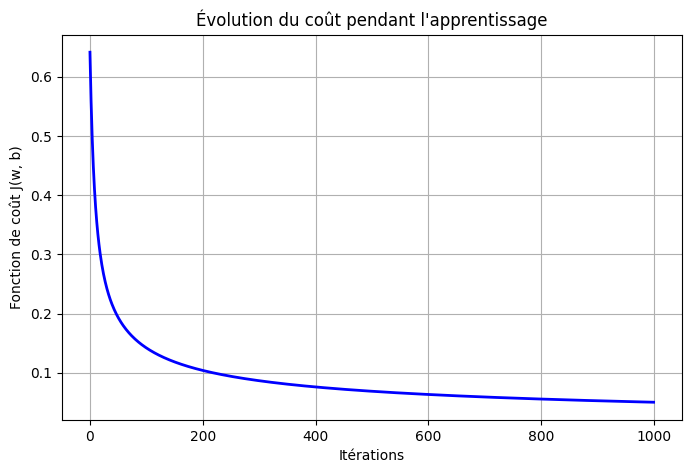

In [82]:
print("\nPoids appris :", w)
print("Biais appris :", b)

#visualisation de suivi de coût
plt.figure(figsize=(8,5))
plt.plot(range(epochs), costs, color='blue', linewidth=2)
plt.title("Évolution du coût pendant l'apprentissage")
plt.xlabel("Itérations")
plt.ylabel("Fonction de coût J(w, b)")

plt.grid(True)
plt.show()

### Analyse de la Convergence de la Descente de Gradient

### Phase 1 : Décroissance rapide (0-100 itérations)

Le coût chute brutalement de **~0.65 à ~0.15**. C'est la phase où le modèle "apprend" le plus rapidement.

- Les gradients sont **forts** parce que les prédictions initiales sont très mauvaises (poids = 0)
- Le modèle corrige **massivement** ses paramètres à chaque itération
- L'erreur de prédiction $(\hat{y} - y)$ est grande → corrections importantes


### Phase 2 : Décroissance progressive (100-400 itérations)

La courbe continue de baisser mais **beaucoup plus lentement**, convergeant vers **~0.08**.


- À ce stade, le modèle se "**raffine**" plutôt que d'apprendre massivement
- Les gradients deviennent **plus petits** au fur et à mesure que les prédictions s'améliorent
- Cette diminution progressive crée l'**asymptote** caractéristique
- Les mises à jour des paramètres sont $w \leftarrow w - \alpha \cdot \nabla_w J$ avec $\nabla_w J$ petit


### Phase 3 : Plateau (400+ itérations)

Le coût se stabilise et varie à peine. **Ton modèle a convergé**.

- Les mises à jour des paramètres sont devenues **minuscules**
- Les gradients **approchent zéro** : $|\nabla_w J| \approx 0$
- Le modèle a atteint un point critique où il ne peut plus s'améliorer
- Continuer l'entraînement ne change pratiquement plus rien


### Résumé de la Convergence

| Phase | Itérations | Coût | Gradients | Corrections |
|-------|-----------|------|-----------|-------------|
| **1** | 0-100 | 0.65 → 0.15 | Forts | **Massivement** |
| **2** | 100-400 | 0.15 → 0.08 | Moyens | Progressivement |
| **3** | 400+ | ~0.08 | Faibles | Minuscules |


### Interprétation Mathématique

Le comportement de ta courbe reflète la **formule du gradient** en régression logistique :

$$\nabla_w J = \frac{1}{m}X^T(\hat{y} - y)$$

- **Début** : L'erreur $(\hat{y} - y)$ est grande → gradients grands → corrections grandes
- **Fin** : L'erreur $(\hat{y} - y)$ est petite → gradients petits → corrections petites

